# Compare with different classification model

Compare the training time and performance between five classification models:

1. KNN
2. Logistic Regression
3. Decision Tree
4. Neural Network
5. SVM

I use the 3 sample datasets and make average to compare the differenct models:

1. Iris (The most simplist dataset to train)
2. Wine (A little bit complex... The feature is more than Iris dataset)
3. Digit (Image dataset)

# Conclusion

The average training time: Neural Network > Logistic Regression > KNN > SVM > Decision Tree  
The average f1-score: Logistic Regression > SVM > Decision Tree > KNN > Neural Network

So we could see that the neural need more resourse to training the data set.  
Although the nerual network have the good performance in classification, it need more time and complicate tuning to training the data.

If we want to try to see the performance very quickly, we could try the decision tree or SVM first.
These two is more faster than other model and could get a good performance.

In structure data, we also could try the logistic regression first.
The performance of logistic regression is worth to try on the dataset.

Neural Network is a very powerful to classify the data, but it need more time to training and tuning the model like add more layer or neuron.

KNN get a average performance between these model, but it also is a very useful tool been used in feature engineering (predict the null data) or recommendation system field.

I think the better way is sampling the data into small dataset, and use the all model to train and get a baseline.
This baseline is very useful to let you decide which model you could pay more time to dig in.

Hope everyone get a nice performance in all dataset!

# Start Comparing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.datasets import load_iris, load_wine, load_digits

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.cross_validation import train_test_split as cv
from sklearn.metrics import f1_score

import time

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Define dataset loading function
def load_data(dataset_fn):
    data = dataset_fn
    return data.data, data.target

## Define all classfier

In [3]:
#Define the classifier
knn = KNeighborsClassifier()
svm = LinearSVC()
lr = LogisticRegression()
tree = DecisionTreeClassifier()
nn = MLPClassifier()

classifier_lst = [knn, lr, svm, tree, nn]
classifier_lst_name = ['KNN', 'Logistic_Regression', 'SVM', 'DecisionTree', 'NeuralNetwork']

## Define classifier training function

In [4]:
def make_baseline(dataset_fn, classifier):
    
    start_time = time.time()
    
    feature, target = load_data(dataset_fn)
    x_train, x_test, y_train, y_test = cv(feature, target, random_state = 42)
    classifier.fit(x_train, y_train)
    
    training_score = classifier.score(x_train, y_train)
    testing_score = classifier.score(x_test, y_test)
    score = f1_score(y_test, classifier.predict(x_test), average='weighted')
    
    print(classifier)
    print('Training Score: {:.4f}'.format(training_score))
    print('Testing Score: {:.4f}'.format(testing_score))
    print('The f1 score is: {}'.format(score))

    end_time = time.time()
    training_time = end_time-start_time
    
    print('The training time is: {:.4f}\n'.format((training_time)))
    
    return score, training_time

## Start to training differenct dataset

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Training Score: 0.9643
Testing Score: 1.0000
The f1 score is: 1.0
The training time is: 0.0039

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Training Score: 0.9643
Testing Score: 1.0000
The f1 score is: 1.0
The training time is: 0.1681

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Training Score: 0.9732
Testing Score: 1.0000
The f1 score is: 1.0
The training time is: 0.0072

DecisionTreeClassifier(class_weight=None, criterion='gini', max_dept

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5,1,'F1-Score')

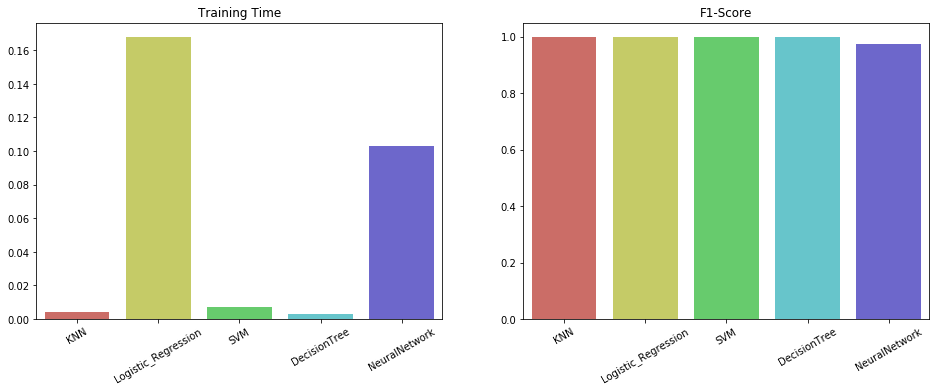

In [5]:
#Iris dataset
iris = load_iris()
iris_score_lst = []
iris_time_lst = []

for i in classifier_lst:
    score, training_time = make_baseline(iris,i)
    iris_score_lst.append(score)
    iris_time_lst.append(training_time)

plt.figure(figsize=(16,12))
subplot(2,2,1)
sn.barplot(x=classifier_lst_name, y=iris_time_lst, palette=sn.color_palette('hls'))
plt.xticks(rotation=30)
plt.title('Training Time')

subplot(2,2,2)
sn.barplot(x=classifier_lst_name, y=iris_score_lst, palette=sn.color_palette('hls'))
plt.xticks(rotation=30)
plt.title('F1-Score')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Training Score: 0.7669
Testing Score: 0.7111
The f1 score is: 0.7111111111111111
The training time is: 0.0035

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Training Score: 0.9774
Testing Score: 0.9778
The f1 score is: 0.9776949363156261
The training time is: 0.0033

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Training Score: 0.8722
Testing Score: 0.9111
The f1 score is: 0.9104105090311987
The training time is: 0.0177

DecisionTreeClassifier(

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5,1,'F1-Score')

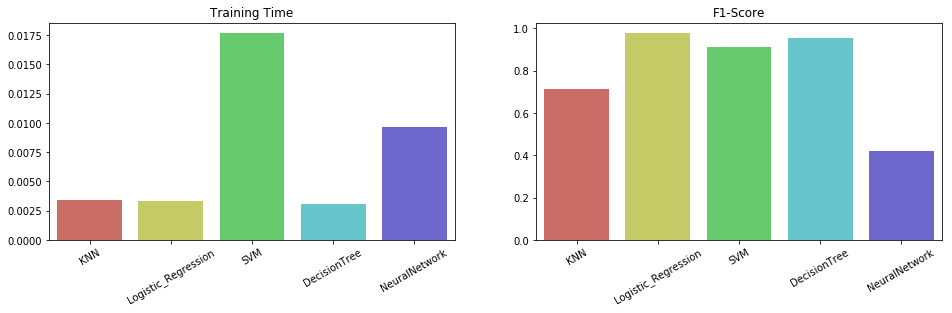

In [6]:
#Wine dataset
wine = load_wine()
wine_score_lst = []
wine_time_lst = []

for i in classifier_lst:
    score, training_time = make_baseline(wine,i)
    wine_score_lst.append(score)
    wine_time_lst.append(training_time)

plt.figure(figsize=(16,4))
subplot(1,2,1)
sn.barplot(x=classifier_lst_name, y=wine_time_lst, palette=sn.color_palette('hls'))
plt.xticks(rotation=30)
plt.title('Training Time')
subplot(1,2,2)
sn.barplot(x=classifier_lst_name, y=wine_score_lst, palette=sn.color_palette('hls'))
plt.xticks(rotation=30)
plt.title('F1-Score')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Training Score: 0.9889
Testing Score: 0.9933
The f1 score is: 0.9933082556240451
The training time is: 0.2941

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Training Score: 0.9948
Testing Score: 0.9667
The f1 score is: 0.9670228496107158
The training time is: 0.1705

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Training Score: 0.9926
Testing Score: 0.9600
The f1 score is: 0.9605515894145703
The training time is: 0.1141

DecisionTreeClassifier(

Text(0.5,1,'F1-Score')

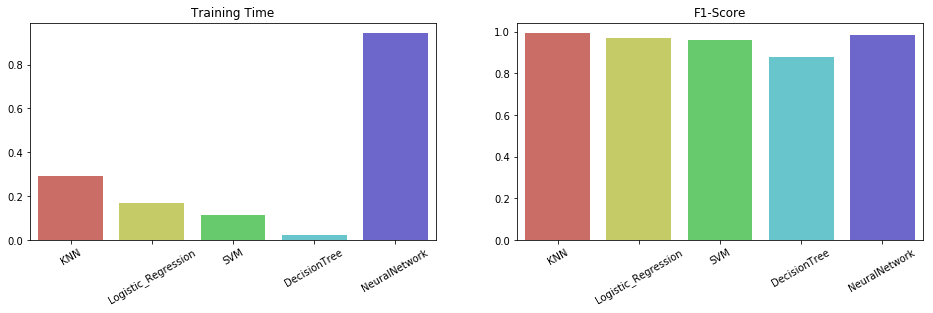

In [7]:
#Digits Dataset
digits = load_digits()
digits_score_lst = []
digits_time_lst = []

for i in classifier_lst:
    score, training_time = make_baseline(digits,i)
    digits_score_lst.append(score)
    digits_time_lst.append(training_time)

plt.figure(figsize=(16,4))
subplot(1,2,1)
sn.barplot(x=classifier_lst_name, y=digits_time_lst, palette=sn.color_palette('hls'))
plt.xticks(rotation=30)
plt.title('Training Time')
subplot(1,2,2)
sn.barplot(x=classifier_lst_name, y=digits_score_lst, palette=sn.color_palette('hls'))
plt.xticks(rotation=30)
plt.title('F1-Score')

In [8]:
for idx, name in enumerate(classifier_lst_name):
    print('The classifier is: {}'.format(name))
    avg_time = np.mean([iris_time_lst[idx], wine_time_lst[idx], digits_time_lst[idx]])
    avg_score = np.mean([iris_score_lst[idx], wine_score_lst[idx], digits_score_lst[idx]])
    print('Average training time is: {}'.format(avg_time))
    print('Average training score is {}\n'.format(avg_score))

The classifier is: KNN
Average training time is: 0.10048906008402507
Average training score is 0.9014731222450522

The classifier is: Logistic_Regression
Average training time is: 0.11396439870198567
Average training score is 0.9815725953087805

The classifier is: SVM
Average training time is: 0.04633522033691406
Average training score is 0.9569873661485896

The classifier is: DecisionTree
Average training time is: 0.009070316950480143
Average training score is 0.9442775573786487

The classifier is: NeuralNetwork
Average training time is: 0.35243646303812665
Average training score is 0.7924832342457985

